**Program 01:Innovations from AR(1) model ----- Case study**

In [1]:
import matplotlib.pyplot as plt
from statsmodels.datasets import sunspots
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Load data
data = sunspots.load_pandas().data['SUNACTIVITY']

#Fit AR(1)
model = ARIMA(data,order=(1,0,0)).fit()
innovations = model.resid
print("===Program 1 Output===")
print(model.summary())
print("\nFirst 10 Innovations:\n",innovations.head(10))

===Program 1 Output===
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1406.585
Date:                Sun, 21 Sep 2025   AIC                           2819.169
Time:                        18:16:38   BIC                           2830.369
Sample:                             0   HQIC                          2823.647
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3963      9.949      4.865      0.000      28.897      67.895
ar.L1          0.8244      0.036     23.011      0.000       0.754       0.895
sigma2       524.5565     39.

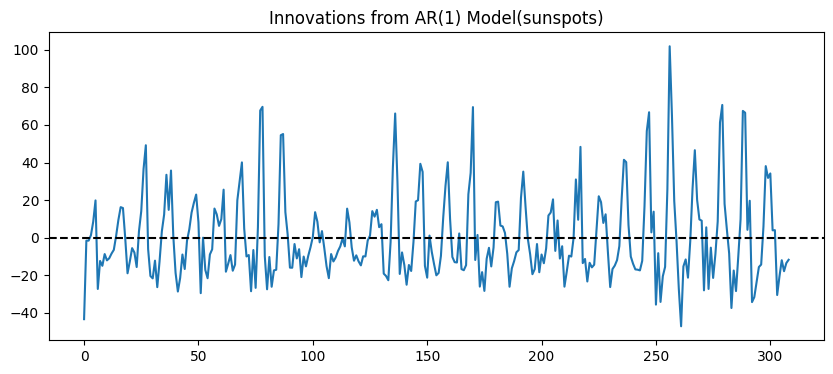

In [3]:
#Plot
plt.figure(figsize=(10, 4))
plt.plot(innovations)
plt.axhline(0,color="black",linestyle="--")
plt.title('Innovations from AR(1) Model(sunspots)')
plt.show()


**Program 02:Innovations from ARMA(2,1) - GDP Growth**

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import macrodata

In [5]:
#Load GDP data
macro = macrodata.load_pandas().data
gdp = macro['realgdp']

In [6]:
#Fit ARMA(2,1)
model = ARIMA(gdp, order=(2,0,1)).fit()
innovations = model.resid

In [7]:
print("\n===Program 2 Output===")
print(model.summary())
print("\n First ten innovations:\n",innovations.head(10))



===Program 2 Output===
                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  203
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1108.633
Date:                Sun, 21 Sep 2025   AIC                           2227.267
Time:                        18:16:53   BIC                           2243.833
Sample:                             0   HQIC                          2233.969
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7221.2123   4188.469      1.724      0.085    -988.036    1.54e+04
ar.L1          1.9395      0.035     55.407      0.000       1.871       2.008
ar.L2         -0.9397      0

**Program 03 : Innovations from ARIMA(1,1,1)(CPI Inflation)**

In [8]:
import numpy as np
#Compute quaterly inflation
cpi = macro['cpi']
inflation = np.log(cpi).diff().dropna()

In [9]:
#Fit ARIMA(1,1,1)
model = ARIMA(inflation,order=(1,1,1)).fit()
innovations = model.resid
print("\n===Program 3 Output===")
print(model.summary())
print("\n First ten innovations:\n",innovations.head(10))



===Program 3 Output===
                               SARIMAX Results                                
Dep. Variable:                    cpi   No. Observations:                  202
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 749.637
Date:                Sun, 21 Sep 2025   AIC                          -1493.275
Time:                        18:16:56   BIC                          -1483.365
Sample:                             0   HQIC                         -1489.265
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0301      0.068     -0.446      0.656      -0.163       0.102
ma.L1         -0.6002      0.067     -8.963      0.000      -0.731      -0.469
sigma2      3.361e-05   2.01

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


**`Program 04 : Innovations from ARIMA(1,1,1)(Airline Passengers)`**

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

#Load airline data
airline_data = get_rdataset('AirPassengers').data['value']
#Fit ARIMA(1,1,1)
model = ARIMA(airline_data,order=(1,1,1)).fit()
innovations = model.resid
print("\n===Program 4 Output===")
print(model.summary())
print("\n First ten innovations:\n",innovations.head(10))


===Program 4 Output===
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 21 Sep 2025   AIC                           1394.683
Time:                        18:17:05   BIC                           1403.571
Sample:                             0   HQIC                          1398.294
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107

**Program 05:Ljung-Box Test on innovations**

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(innovations,lags=[10],return_df=True)
print("\n===Program 5 Output===")
print(lb_test)



===Program 5 Output===
     lb_stat  lb_pvalue
10  28.82991   0.001328
